# Caribbean Region Temperature Anomaly Forecast for 2026 using LSTM (Long Short-Term Memory)

In this section we will utilise the LSTM model to forecast temperature anomalies for the Caribbean Region for the year 2026.
LSTM is a popular machine lerning technique which can learn sequences and predict seasonal time series targets. LSTM is a supervised technique, we will have to perform some feature engineering to turn out time series data into a suitable dataset.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [23]:
#First, let's import out dataset

# Load the dataset

from utils import load_caribbean_weather

df = load_caribbean_weather()

In [125]:
temp = df[['temp_anomaly']]


In [126]:
temp

,temp_anomaly
date,
1980-01-01,0.29
1980-02-01,0.31
1980-03-01,0.28
1980-04-01,0.29
1980-05-01,0.35
...,...
2025-06-01,1.02
2025-07-01,1.00
2025-08-01,1.04


## Create sequences 
for the lstm model, where the model predicts the 13th month given the previous 12 months. 

In [103]:
def create_sequences(df, lookback):
    #convert the df to numpy
    df_to_np = df.to_numpy()
    X, y = [],[]

    for i in range(len(df_to_np) - lookback):
        X.append(df_to_np[i:i+lookback])
        y.append(df_to_np[i + lookback])

    return np.array(X), np.array(y)

In [116]:
LOOKBACK=12
X, y = create_sequences(temp, LOOKBACK)

## Train/Test/Validation set split

In [106]:
X_train, y_train = X[:-24], y[:-24]
X_val, y_val = X[-24:-12], y[-24:-12]
X_test, y_test = X[-12:], y[-12:]

## Build the LSTM Model

In [98]:
'''
from tensorflow.keras.model import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
'''

'\nfrom tensorflow.keras.model import Sequential\nfrom tensorflow.keras.layers import *\nfrom tensorflow.keras.callbacks import ModelCheckpoint\nfrom tensorflow.keras.losses import MeanSquaredError\nfrom tensorflow.keras.metrics import RootMeanSquaredError\nfrom tensorflow.keras.optimizers import Adam\n'

In [100]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.models import load_model
from keras import layers

In [165]:
'''
model1 = Sequential()
model1.add(InputLayer((12,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
'''


'''
model1 = Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, 
                   input_shape=(LOOKBACK, 1)),
        layers.Dropout(0.2),
        layers.LSTM(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
'''

model1 = Sequential([
    layers.LSTM(50, activation='relu', input_shape=(LOOKBACK, 1)),  # 12 timesteps, 1 feature
    layers.Dense(1)  # Predict the 13th month value
])

model1.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=[RootMeanSquaredError()])

filepath = 'model2/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.keras'
cp = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, mode='min', save_best_only = True)

model1.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the LSTM model

In [166]:

history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
 9/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1951 - root_mean_squared_error: 0.4414
Epoch 1: val_loss improved from inf to 1.29190, saving model to model2/my_best_model.epoch01-loss1.29.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.2000 - root_mean_squared_error: 0.4470 - val_loss: 1.2919 - val_root_mean_squared_error: 1.1366
Epoch 2/10
12/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1913 - root_mean_squared_error: 0.4372 
Epoch 2: val_loss improved from 1.29190 to 1.20233, saving model to model2/my_best_model.epoch02-loss1.20.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1912 - root_mean_squared_error: 0.4371 - val_loss: 1.2023 - val_root_mean_squared_error: 1.0965
Epoch 3/10
 9/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1858 - root_mean_squared_error: 0.4309 
Epoch 3: val_loss improved from 1.20233 to 1.10855, saving model to model2/my_best_model.epoch03-loss1.11.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1820 - root_mean_squared_er

In [167]:
model1 = load_model('model2/my_best_model.epoch10-loss0.44.keras')

## Evaluate the model

### Training predictions

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


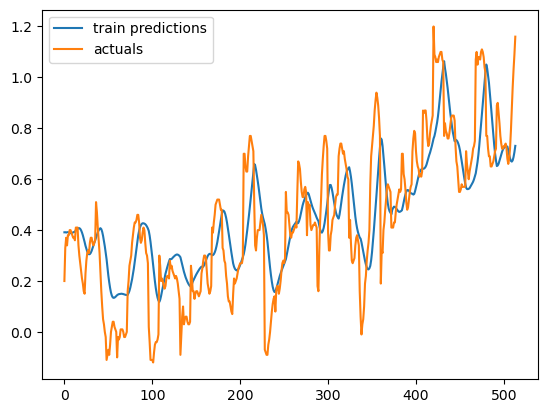

In [110]:
train_predict = model1.predict(X_train).flatten()

train_results = pd.DataFrame(
{
    'train_predictions': train_predict,
    'actuals': y_train.flatten()
})

plt.plot(train_results['train_predictions'], label='train predictions')
plt.plot(train_results['actuals'], label = 'actuals')
plt.legend()


### Evaluating the validation set predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


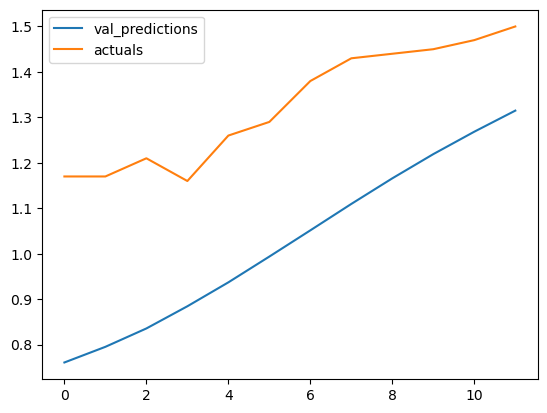

In [111]:
val_predict = model1.predict(X_val).flatten()

val_results = pd.DataFrame(
{
    'val_predictions': val_predict,
    'actuals': y_val.flatten()
})

plt.plot(val_results['val_predictions'], label='val_predictions')
plt.plot(val_results['actuals'], label = 'actuals')
plt.legend()

### Evaluating the test set predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


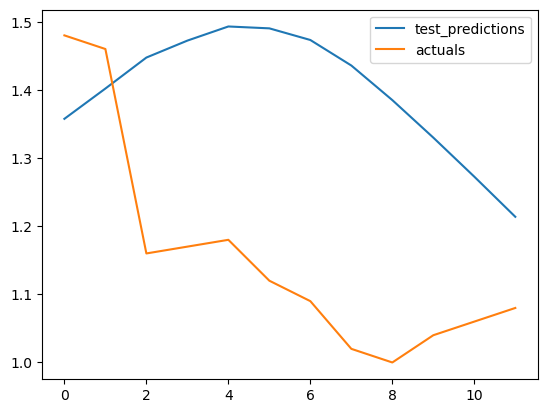

In [112]:
test_predict = model1.predict(X_test).flatten()

test_results = pd.DataFrame(
{
    'test_predictions': test_predict,
    'actuals': y_test.flatten()
})

plt.plot(test_results['test_predictions'], label='test_predictions')
plt.plot(test_results['actuals'], label = 'actuals')
plt.legend()

## LSTM Evaluation Metrics

Here we will print out the model evaluation metrics useful for comparing it with our previous models :
XGBoost and SARIMA.


In [113]:
print('Evaluation Statistics of LSTM model for forecasting temperature anomalies of the Caribbean Region')

rmse = history.history['val_root_mean_squared_error'][9]
print(f'Root Mean Squared Error (RMSE) for validation set = {rmse}')

val_loss = history.history['val_loss'][9]
print(f'The validation set loss  = {val_loss}')

Evaluation Statistics of LSTM model for forecasting temperature anomalies of the Caribbean Region
Root Mean Squared Error (RMSE) for validation set = 0.3068677484989166
The validation set loss  = 0.09416782110929489


## Future Forecast: next 12 months of temperature anomalies

In [ ]:
'''
def create_sequences(df, lookback):
    #convert the df to numpy
    df_to_np = df.to_numpy()
    X, y = [],[]

    for i in range(len(df_to_np) - lookback):
        X.append(df_to_np[i:i+lookback])
        y.append(df_to_np[i + lookback])

    return np.array(X), np.array(y)
'''

def create_future_sequences(df, date, lookback):
    df_to_np = df.tail(lookback).to_numpy()
    X, y = [],[]

    for i in range(lookback):
        df_to_np

In [198]:
# Forecast Next 12 Months (Recursive Forecasting with Dynamic Features)
last_date = temp.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=12, freq='MS')

historical = temp.copy()  # Use a copy of historical series

future_predictions = []

for date in future_dates:
    window = pd.date_range(end=last_date, periods=LOOKBACK, freq='MS')
    X_forecast = historical.loc[window].values
    print(f'Date =  {date}\n')
    X_forecast = X_forecast.reshape((X_forecast.shape[1], X_forecast.shape[0], 1))
    print(X_forecast)
    y_forecast = model1.predict(X_forecast)
    print(f'y_forecast = {y_forecast}\n')

    future_predictions.append(y_forecast)
    print(f'future_predictions = {future_predictions}\n')
    # Update historical with the new prediction for next iteration
    #historical = pd.concat([historical, pd.Series([y_forecast], index = [date])])
    historical.loc[len(df)] = [date, y_forecast]

    #future_predictions
    print(f'historical tail 12 = {historical.tail(12)}\n')


#last_date, future_dates, historical.tail()
#X_train.shape, X_test.shape, y_train.shape, y_test.shape


Date =  2025-11-01 00:00:00

[[[1.48]
  [1.46]
  [1.16]
  [1.17]
  [1.18]
  [1.12]
  [1.09]
  [1.02]
  [1.  ]
  [1.04]
  [1.06]
  [1.08]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
y_forecast = [[0.64698595]]

future_predictions = [array([[0.64698595]], dtype=float32)]



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
for month in future_dates:
    X_forecast = historical.tail(LOOKBACK).to_numpy()
    y_forecast = model1.predict(X).flatten()

    future_predictions.append(y_forecast)

    # Update historical with the new prediction for next iteration
    historical = pd.concat([historical, pd.Series([y_forecast], index=[date])])

future_dates, X_forecast, y_forecast, historical.tail()  